In [2]:
!pip install mnist 
!pip install keras 

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.2 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 571.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 2.0 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.1 MB 2.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.1 MB 3.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.6/1.1 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 7.7 MB/s eta 0:00:00
   ----------------

In [3]:
!pip install tensorflow

   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 2.0 MB/s eta 0:03:11
   ---------------------------------------- 0.2/377.0 MB 2.3 MB/s eta 0:02:43
   ---------------------------------------- 0.2/377.0 MB 2.3 MB/s eta 0:02:45
   ---------------------------------------- 0.4/377.0 MB 2.7 MB/s eta 0:02:20
   ---------------------------------------- 0.9/377.0 MB 5.1 MB/s eta 0:01:14
   ---------------------------------------- 1.3/377.0 MB 6.6 MB/s eta 0:00:58
   ---------------------------------------- 1.5/377.0 MB 6.6 MB/s eta 0:00:58
   ---------------------------------------- 1.6/377.0 MB 5.6 MB/s eta 0:01:07
   ---------------------------------------- 2.2/377.0 MB 7.1 MB/s eta 0:00:54
   ---------------------------------------- 2.7/377.0 MB 7.4 MB/s eta 0:00:51
   ---------------------------------------- 2.9/377.0 MB 7.8 MB/s eta 0:00:49
   ---------------------------------------- 3.3/377.0 MB 7.8 MB/s eta 0

In [12]:
import numpy as np 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 
from tensorflow.keras.utils import to_categorical

In [13]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


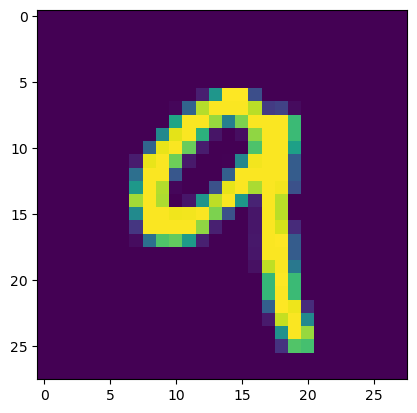

In [16]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[110])
plt.show()

In [17]:
y_train[110]

9

In [19]:
x_train = x_train / 255. 
x_test = x_test / 255.

In [21]:
x_train = x_train - np.mean(x_train)
x_test = x_test - np.mean(x_train)

np.mean(x_train)

-1.0453014115661235e-17

In [22]:
x_train[0].shape

(28, 28)

In [24]:
x_train = np.expand_dims(x_train, axis=3)
x_train[0].shape

(28, 28, 1)

In [25]:
x_test = np.expand_dims(x_test, axis=3)

In [27]:
yi = to_categorical(y_train)
yi[0], y_train[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]), 5)

In [28]:
yi[110], y_train[110]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]), 9)

In [29]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)


In [43]:
model = Sequential([
    Conv2D(8, 3, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),
    Conv2D(10, 3),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()

d:\LUCHICI\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 10)     │           730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,320 (12.97 KB)

 Trainable params: 3,320 (12.97 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    "adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [45]:
result = model.fit(
    x_train,
    y_train_oh,
    epochs=3,
    validation_data=(x_test, y_test_oh)
)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8164 - loss: 0.6243 - val_accuracy: 0.9355 - val_loss: 0.2065
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9631 - loss: 0.1232 - val_accuracy: 0.9585 - val_loss: 0.1273
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9722 - loss: 0.0933 - val_accuracy: 0.9723 - val_loss: 0.0875


In [46]:
pred = model.predict(np.expand_dims(x_test[10], axis=0))[0]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([9.9998856e-01, 5.1751759e-11, 1.8222939e-07, 3.1893523e-09,
       3.0389870e-12, 1.5987582e-07, 7.1106729e-07, 2.5319075e-10,
       7.5266898e-06, 2.9106777e-06], dtype=float32)

In [47]:
np.argmax(pred)

0

In [48]:
y_test[10]

0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


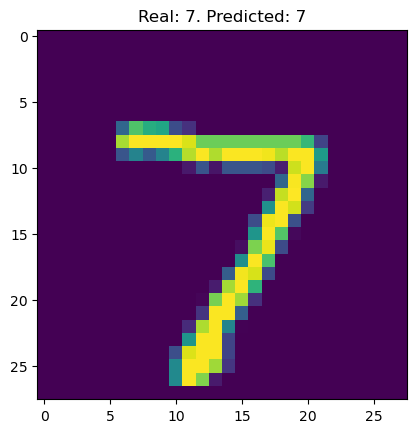

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


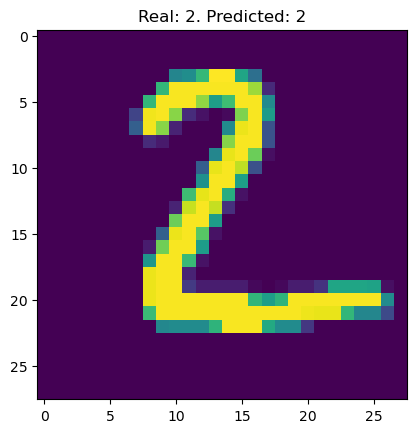

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


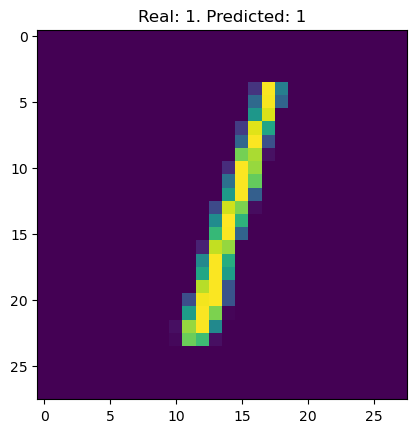

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


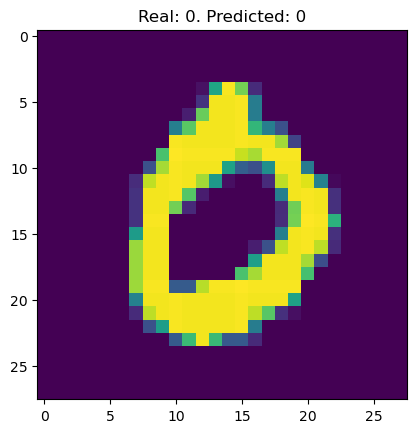

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


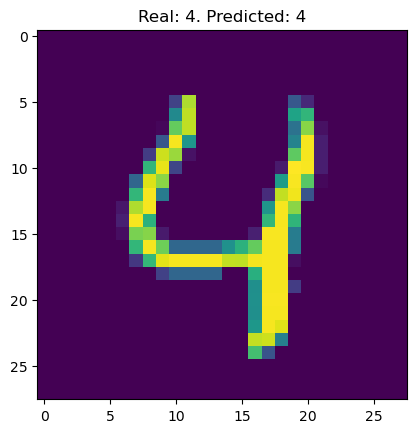

In [49]:
for i in range(5):
    pred = np.argmax(model.predict(np.expand_dims(x_test[i], axis=0))[0])
    plt.imshow(x_test[i])
    plt.title(f"Real: {y_test[i]}. Predicted: {pred}")
    plt.show() 